In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import umap
from matplotlib.cm import get_cmap

In [7]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'utils'))

from utils.display_plots import plot

## Load Data

In [29]:
data = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\data.csv")
labels = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\labels.csv")

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_38632\923119767.py:1: SyntaxWarning: invalid escape sequence '\.'
  data = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\data.csv")
C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_38632\923119767.py:2: SyntaxWarning: invalid escape sequence '\.'
  labels = pd.read_csv("~\.cache\kagglehub\datasets\waalbannyantudre\gene-expression-cancer-rna-seq-donated-on-682016\\versions\\1\labels.csv")


## Pre-Processing

In [ ]:
data = data.rename(columns={"Unnamed: 0": "sample_id"})
labels = labels.rename(columns={"Unnamed: 0": "sample_id"})
genes = data.filter(regex="gene_")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(genes)

In [ ]:
# le = LabelEncoder()
# labels["Class"] = le.fit_transform(labels["Class"])

## UMAP Implementation

In [33]:
# Configure UMAP
reducer = umap.UMAP(
    n_components=2,      # Output dimensions (2 for visualization)
    n_neighbors=15,      # default
    random_state=42
)
embeddings_15 = reducer.fit_transform(scaled_data)
embeddings_supervised_15 = reducer.fit_transform(scaled_data, y=labels["Class"])

c:\Users\ayarmanco\personalworkspace\kaggle_env\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_38632\1941819918.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap('viridis', len(unique_labels))


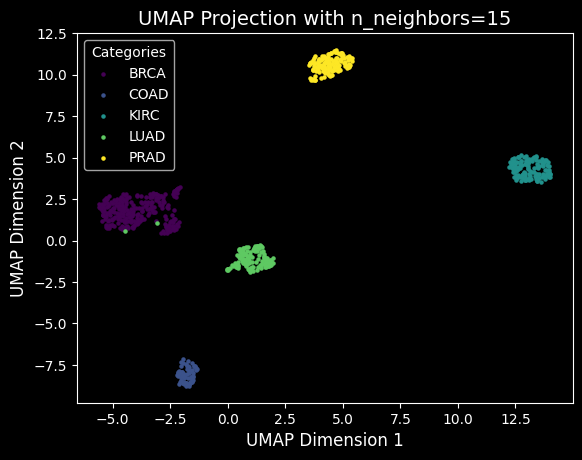

C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_38632\1941819918.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap('viridis', len(unique_labels))


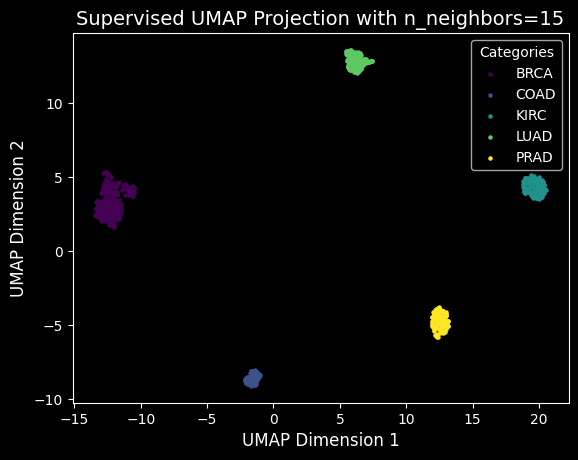

In [ ]:
plot(embeddings_15, labels["Class"], 'UMAP Projection with n_neighbors=15')
plot(embeddings_supervised_15, labels["Class"], 'Supervised UMAP Projection with n_neighbors=15')

In [36]:
# Configure UMAP
reducer = umap.UMAP(
    n_components=2,      # Output dimensions (2 for visualization)
    n_neighbors=3,       # local structure
    random_state=42
)
embeddings_3 = reducer.fit_transform(scaled_data)
embeddings_supervised_3 = reducer.fit_transform(scaled_data, y=labels["Class"])

c:\Users\ayarmanco\personalworkspace\kaggle_env\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_38632\1941819918.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap('viridis', len(unique_labels))


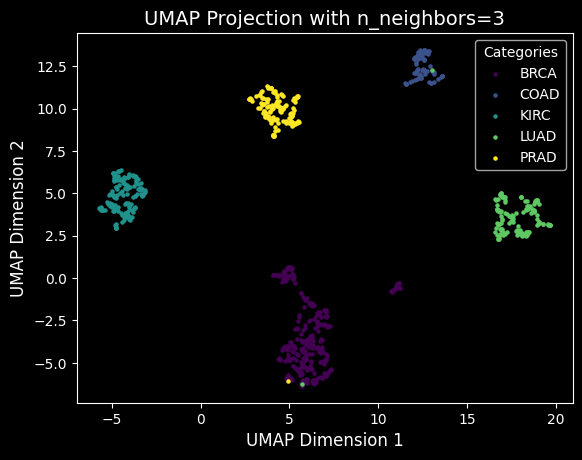

C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_38632\1941819918.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap('viridis', len(unique_labels))


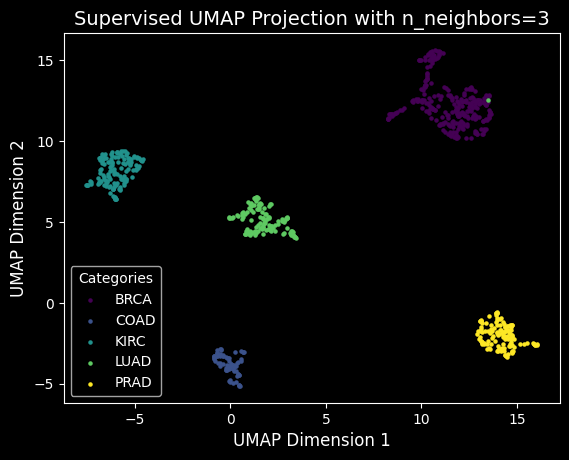

In [ ]:
plot(embeddings_3, labels["Class"], 'UMAP Projection with n_neighbors=3')
plot(embeddings_supervised_3, labels["Class"], 'Supervised UMAP Projection with n_neighbors=3')

In [39]:
# Configure UMAP
reducer = umap.UMAP(
    n_components=2,      # Output dimensions (2 for visualization)
    n_neighbors=60,      # global structure
    random_state=42
)
embeddings_60 = reducer.fit_transform(scaled_data)
embeddings_supervised_60 = reducer.fit_transform(scaled_data, y=labels["Class"])

c:\Users\ayarmanco\personalworkspace\kaggle_env\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_38632\1941819918.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap('viridis', len(unique_labels))


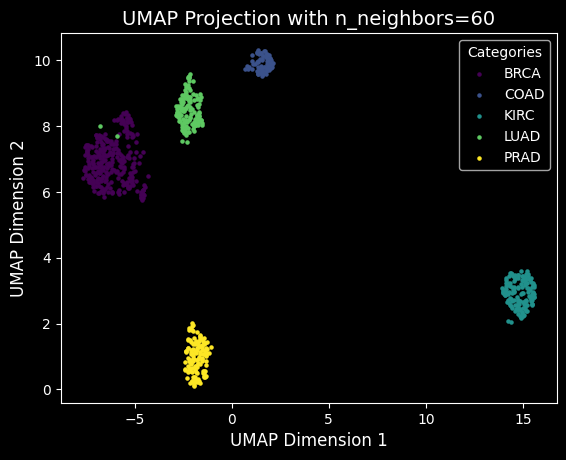

C:\Users\ayarmanco\AppData\Local\Temp\ipykernel_38632\1941819918.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap('viridis', len(unique_labels))


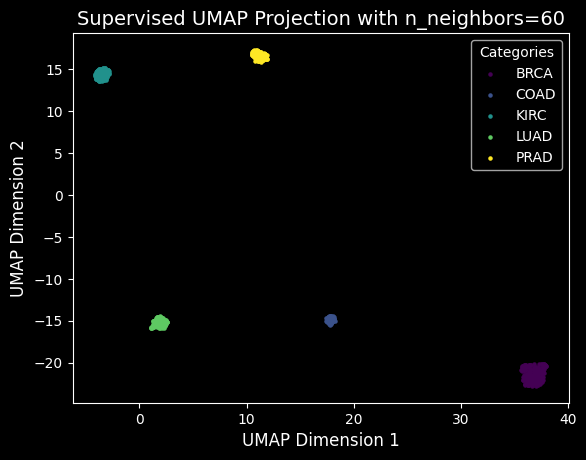

In [ ]:
plot(embeddings_60, labels["Class"], 'UMAP Projection with n_neighbors=60')
plot(embeddings_supervised_60, labels["Class"], 'Supervised UMAP Projection with n_neighbors=60')